## Lesson 3: A Practical Guide to ArcPy

### Exercise 1: "Python-ify" Your GIS Workflow
In this exercise you will begin taking steps to automate a common workflow using ArcPy. We'll walk through a common process that many image analysts perform: loading imagery into ArcGIS Pro, creating a mosaic dataset, and then clipping the mosaic dataset to an Area of Interest.

When writing Python in ArcGIS Pro, it's highly recommended to take advantage of the Copy Python Command Tool to copy the syntax of any Geoprocessing Tool. In this lesson, we'll fill out the parameters manually within the Geoprocessing Tools, then copy the Python snippets to configure later.

#### Create Mosaic Dataset

1. Open the 'Create Mosaic Dataset' Geoprocessing Tool.
2. Input the following parameters:
    - **Output Location** - arcpy_workshop.gdb 
        - Catalog > Databases > arcpy_workshop.gdb
    - **Mosaic Dataset Name** - Kangaroo_Island_2019
    - **Coordinate System** - WGS_1984_UTM_Zone_53S 
        - Current Map [Kangaroo Island Map]
    - **Product Definition** - Custom
    - **Product Properties (Band Names)** - AOT, Coastal, Blue, Green, Red, VRE1, VRE2, VRE3, NIR, Water Vapor, SWIR1, SWIR2, VRE4
3. Without running the tool, select the 'Copy Python Command' button and paste the results below
*Note: Your file paths will be different than the solution*

In [ ]:
# Enter Solution & Run Cell Block

<details>
<summary> <b> Reveal Answer </b> </summary>

    arcpy.management.CreateMosaicDataset(
        in_workspace=arcpy.env.workspace,
        in_mosaicdataset_name="Kangaroo_Island_2019",
        coordinate_system='PROJCS["WGS_1984_UTM_Zone_53S",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",10000000.0],PARAMETER["Central_Meridian",135.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]',
        num_bands=13,
        pixel_type="",
        product_definition="CUSTOM",
        product_band_definitions="AOT # #;Coastal # #;Blue # #;Green # #;Red # #;VRE1 # #;VRE2 # #;VRE3 # #;NIR # #;'Water Vapor' # #;SWIR1 # #;SWIR2 # #;VRE4 # #"
    )
</details>

#### Add Rasters to Mosaic Dataset from Microsoft Planetary Computer STAC Connection

1. Explore the Sentinel-2 L2A STAC Connection
    - Catalog > STACs Folder > Right Click Sentinel-2 L2A.astac > Explore STAC
    
    
2. Input the following parameters:
    - **Collection Name** - sentinel-2-l2a
    - **Date and Time** - 12/15/2019 12:00:00 PM - 12/16/2019 10:00:00 PM
    - **Extent** - Kangaroo Island
    - **Attributes** - Dataset
        - eo:cloud_cover <= 1
    - **View Results**
    
    
3. Select the checkboxes for the top 2 STAC items.
    - S2A_MSIL2A_20191216T004701_R102_T53HPA_20201003T053204
    - S2A_MSIL2A_20191216T004701_R102_T53HQA_20201003T053204
         
         
4. With the 2 STAC items selected, click the folder drop-down button in the top-left of the tool. Select 'Add to Mosaic Dataset'.


5. Input the following parameters:
    - **Mosaic Dataset** - Kangaroo_Island_2019
    - **Raster Processing** - Check 'Calculate Statistics' & 'Build Raster Pyramids'
    
    
6. Without running the tool, select the 'Copy Python Command' button and paste the results below
    

In [ ]:
# Enter Solution & Run Cell Block

<details>
<summary> <b> Reveal Answer </b> </summary>
    
    import os
    arcpy.management.AddRastersToMosaicDataset(
        in_mosaic_dataset="Kangaroo_Island_2019",
        raster_type="Raster Dataset",
        input_path=os.path.join(arcpy.mp.ArcGISProject("CURRENT").homeFolder, "Rasters_2019.csv"),
        # OR input_path=os.path.join(arcpy.mp.ArcGISProject("CURRENT").homeFolder, "commondata\\userdata\\Rasters_2019.csv"),
        # OR input_path=os.path.join(arcpy.mp.ArcGISProject("CURRENT").homeFolder, "Kangaroo-Island-ArcPy-Workshop\\assets\\Rasters_2019.csv"),
        update_cellsize_ranges="UPDATE_CELL_SIZES",
        update_boundary="UPDATE_BOUNDARY",
        update_overviews="NO_OVERVIEWS",
        maximum_pyramid_levels=None,
        maximum_cell_size=0,
        minimum_dimension=1500,
        spatial_reference=None,
        filter="",
        sub_folder=None,
        duplicate_items_action="ALLOW_DUPLICATES",
        build_pyramids="BUILD_PYRAMIDS",
        calculate_statistics="CALCULATE_STATISTICS",
        build_thumbnails=None,
        operation_description="",
        force_spatial_reference=None,
        estimate_statistics="ESTIMATE_STATISTICS",
        aux_inputs="QueryPixelFiles NO",
        enable_pixel_cache="NO_PIXEL_CACHE"
    )
</details>

<b> Recommended Symbology <b>

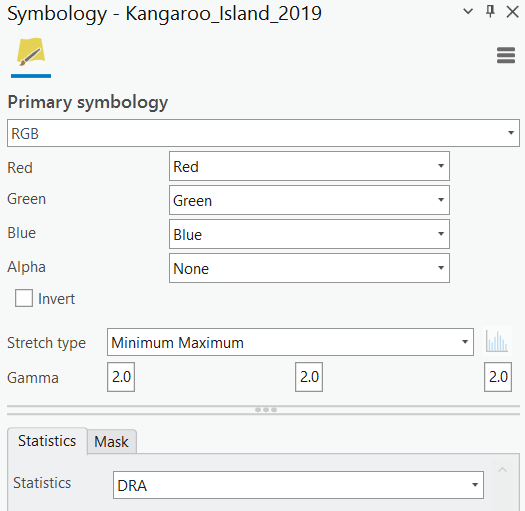

#### Clip Raster to ROI

This section won't have a Geoprocessing Tool associated with it, so we won't be able to use the 'Copy Python Command' button. Instead, we'll have to use Python to access the Image Analyst's version of the Clip tool. This version has several benefits over the Data Management version of the tool because it will allow us to write our output to memory and it retains the band names in the metadata.

1. Create a variable ```kangaroo_clip``` and set it equal to ```arcpy.ia.Clip()```
2. Within the parentheses, create a variable named ```in_raster``` and set it equal to ```Kangaroo_Island_2019```
3. Within the parentheses, create another variable named ```aoi``` and set it equal to ```Kangaroo Island```
4. Outside of the parentheses, create a temporary raster and add it to the active map with the following command ```arcpy.MakeRasterLayer_management(kangaroo_clip, "Kangaroo_Island_2019_Clip")```

In [ ]:
# Enter Solution & Run Cell Block

<details>
<summary> <b> Reveal Answer </b> </summary>

    kangaroo_clip = arcpy.ia.Clip(
        in_raster="Kangaroo_Island_2019",
        aoi="Kangaroo Island"
    )
    arcpy.MakeRasterLayer_management(kangaroo_clip, "Kangaroo_Island_2019_Clip")
</details>

### Exercise 2: Make Inputs Relative
In the previous exercise, we produced a repeatable workflow to mask Sentinel-2 imagery on Kangaroo Island. The 'Copy Python Command' tool is a great starting point for creating repeatable workflows on my own machine, but it has some flaws. Most notably, consider what would happen if trying to run this Notebook on another machine or with with different input rasters? Let's explore how we can make this code 'better' by using relative file paths and inputs. We'll recreate this workflow for Sentinel-2 imagery from 2020.

**arcpy.env.workspace** - ArcPy's method for identifying the project's workspace. The default workspace environment for every project is its default file geodatabase, in this case arcpy_workshop.gdb

In [ ]:
arcpy.env.workspace

**os.path.join** - The os module is part of the Python standard library. os.path.join is a helpful way for joining filepaths to files in an operating system "safe" way.

In [ ]:
import os
os.path.join(arcpy.env.workspace, "example.txt")

**arcpy.mp.ArcGISProject("CURRENT").homeFolder** - A very helpful way for programmatically getting the folder location of the current project.

In [ ]:
arcpy.mp.ArcGISProject("CURRENT").homeFolder

#### Search STAC

1. Explore the Sentinel-2 L2A STAC Connection
    - Catalog > STACs Folder > Right Click Sentinel-2 L2A.astac > Explore STAC
    
    
2. Input the following parameters:
    - **Collection Name** - sentinel-2-l2a
    - **Date and Time** - 12/24/2020 12:00:00 PM - 12/25/2020 10:00:00 PM
    - **Extent** - Kangaroo Island
    - **Attributes** - Dataset
        - eo:cloud_cover <= 20
    - **View Results**
    
    
3. Select the checkboxes for the top 2 STAC items.
    - S2B_MSIL2A_20201225T004709_R102_T53HPA_20201225T152632
    - S2B_MSIL2A_20201225T004709_R102_T53HQA_20201225T152833
         
         
4. With the 2 STAC items selected, click the folder drop-down button in the top-left of the tool. Select 'Add to Mosaic Dataset'.


5. Note where the Input Data is being directed to, a CSV file that's save to the temporary directory for ArcGIS Pro projects. If you ever want to reuse the files you selected in STAC, then go to that location and save to file for future use.

#### Global Variables

1. Use **arcpy.env.workspace** to create a workspace variable of the project's default location ```WORKSPACE = arcpy.env.workspace```
2. Create a mask variable of the Kangaroo Island boundary feature class ```MASK = 'Kangaroo Island'```
3. Create a variable to name the mosaic dataset ```MOSAIC_DATASET_NAME = 'Kangaroo_Island_2020'```
4. Use **os.path.join** to create a mosaic dataset path variable from the project's workspace and the mosaic dataset name ```MOSAIC_DATASET_PATH = os.path.join(WORKSPACE, MOSAIC_DATASET_NAME)```
5. Enter the file path to STAC CSV file that contains our rasters for 2020.

In [ ]:
WORKSPACE = ?

MASK = '?'

MOSAIC_DATASET_NAME = '?'
MOSAIC_DATASET_PATH = os.path.join(?, ?)

STAC_CSV = os.path.join(arcpy.mp.ArcGISProject("CURRENT").homeFolder, "?")

<details>
<summary> <b> Reveal Answer </b> </summary>

    WORKSPACE = arcpy.env.workspace

    MASK = 'Kangaroo Island'

    MOSAIC_DATASET_NAME = 'Kangaroo_Island_2020'
    MOSAIC_DATASET_PATH = os.path.join(WORKSPACE, MOSAIC_DATASET_NAME)

    STAC_CSV = os.path.join(arcpy.mp.ArcGISProject("CURRENT").homeFolder, "Rasters_2020.csv")
    # Rasters_2020.csv could potentially be stored in the following location:
    # STAC_CSV = os.path.join(arcpy.mp.ArcGISProject("CURRENT").homeFolder, "commondata\\userdata\\Rasters_2020.csv")
    # STAC_CSV = os.path.join(arcpy.mp.ArcGISProject("CURRENT").homeFolder, "Kangaroo-Island-ArcPy-Workshop\\assets\\Rasters_2020.csv"),
</details>

#### Create Mosaic Dataset

1. Input the variable for the ```workspace```
2. Input the variable for the ```mosaic dataset name```

In [ ]:
arcpy.management.CreateMosaicDataset(
    in_workspace= ?,
    in_mosaicdataset_name= ?,
    coordinate_system='PROJCS["WGS_1984_UTM_Zone_53S",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",10000000.0],PARAMETER["Central_Meridian",135.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]',
    num_bands=13,
    pixel_type="",
    product_definition="CUSTOM",
    product_band_definitions="AOT # #;Coastal # #;Blue # #;Green # #;Red # #;VRE1 # #;VRE2 # #;VRE3 # #;NIR # #;'Water Vapor' # #;SWIR1 # #;SWIR2 # #;VRE4 # #"
)

<details>
<summary> <b> Reveal Answer </b> </summary>

    arcpy.management.CreateMosaicDataset(
        in_workspace=WORKSPACE,
        in_mosaicdataset_name=MOSAIC_DATASET_NAME,
        coordinate_system='PROJCS["WGS_1984_UTM_Zone_53S",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",10000000.0],PARAMETER["Central_Meridian",135.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]',
        num_bands=13,
        pixel_type="",
        product_definition="CUSTOM",
        product_band_definitions="AOT # #;Coastal # #;Blue # #;Green # #;Red # #;VRE1 # #;VRE2 # #;VRE3 # #;NIR # #;'Water Vapor' # #;SWIR1 # #;SWIR2 # #;VRE4 # #"
    )
</details>

#### Add Rasters to Mosaic Dataset from Microsoft Planetary Computer STAC Connection

1. Input the variable for the ```mosaic dataset name```
2. Input the variable for the saved ```STAC CSV```

In [ ]:
arcpy.management.AddRastersToMosaicDataset(
    in_mosaic_dataset= ?,
    raster_type="Raster Dataset",
    input_path= ?,
    update_cellsize_ranges="UPDATE_CELL_SIZES",
    update_boundary="UPDATE_BOUNDARY",
    update_overviews="NO_OVERVIEWS",
    maximum_pyramid_levels=None,
    maximum_cell_size=0,
    minimum_dimension=1500,
    spatial_reference=None,
    filter="",
    sub_folder=None,
    duplicate_items_action="ALLOW_DUPLICATES",
    build_pyramids="BUILD_PYRAMIDS",
    calculate_statistics="CALCULATE_STATISTICS",
    build_thumbnails=None,
    operation_description="",
    force_spatial_reference=None,
    estimate_statistics="ESTIMATE_STATISTICS",
    aux_inputs="QueryPixelFiles NO",
    enable_pixel_cache="NO_PIXEL_CACHE"
)

<details>
<summary> <b> Reveal Answer </b> </summary>

    arcpy.management.AddRastersToMosaicDataset(
        in_mosaic_dataset=MOSAIC_DATASET_NAME,
        raster_type="Raster Dataset",
        input_path=STAC_CSV,
        update_cellsize_ranges="UPDATE_CELL_SIZES",
        update_boundary="UPDATE_BOUNDARY",
        update_overviews="NO_OVERVIEWS",
        maximum_pyramid_levels=None,
        maximum_cell_size=0,
        minimum_dimension=1500,
        spatial_reference=None,
        filter="",
        sub_folder=None,
        duplicate_items_action="ALLOW_DUPLICATES",
        build_pyramids="BUILD_PYRAMIDS",
        calculate_statistics="CALCULATE_STATISTICS",
        build_thumbnails=None,
        operation_description="",
        force_spatial_reference=None,
        estimate_statistics="ESTIMATE_STATISTICS",
        aux_inputs="QueryPixelFiles NO",
        enable_pixel_cache="NO_PIXEL_CACHE"
    )
</details>

#### Clip Raster to ROI

1. Input the variable for the ```mosaic dataset name```
2. Input the variable for the kangaroo island ```mask```

In [ ]:
kangaroo_clip_2020 = arcpy.ia.Clip(
    in_raster= ?,
    aoi= ?
)
arcpy.MakeRasterLayer_management(kangaroo_clip_2020, "Kangaroo_Island_2020_Clip")

<details>
<summary> <b> Reveal Answer </b> </summary>

    kangaroo_clip_2020 = arcpy.ia.Clip(
        in_raster= MOSAIC_DATASET_NAME,
        aoi= MASK
    )
    arcpy.MakeRasterLayer_management(kangaroo_clip_2020, "Kangaroo_Island_2020_Clip")
</details>